In [2]:
import os
from glob import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import math
import ephem
from datetime import datetime, time, timedelta
from math import pi, cos, sin
from scipy import optimize
from joblib import Parallel, delayed
from mpl_toolkits.basemap import Basemap

%run diurnal_utils.py

In [52]:
save_figs_dir = '/home/cchristo/proj_tapio/figs/diurnal_cycle_figs/isccp_2000_2010_low_clouds/'
save_output_dir = '/export/data1/cchristo/diurnal_analysis_results/'

In [4]:
# years = ['2000', '2001', '2002', '2003']
# years = ['2000',]

path_to_grid_dirs = '/export/data1/cchristo/isccp_data/'
save_figs_dir = 'figs/diurnal_cycle_figs/'
file_type = '*.nc'


all_grid_file_paths = [y for x in os.walk(path_to_grid_dirs) for y in glob(os.path.join(x[0], file_type))]
all_grid_file_paths = sorted(all_grid_file_paths)

# all_grid_file_paths = []
# for year in years:
#     all_grid_file_paths_ = [y for x in os.walk(path_to_grid_dirs + str(year)) for y in glob(os.path.join(x[0], file_type))]
#     all_grid_file_paths.extend(all_grid_file_paths_)
    


ds = xr.open_mfdataset(all_grid_file_paths, combine='by_coords')


# ds = ds.sel(time=slice('2000','2002'))
# ds = ds.sel(time=slice('2000-01-01','2001-01-01'))
# ds = ds.sel(time=slice('2000-06-01','2011-06-01'))
ds = ds.sel(time=slice('2000-01-01','2010-01-01'))
ds = ds.sel(lat= slice(-60, 60))


In [7]:
ds

<xarray.Dataset>
Dimensions:             (cloud_irtype: 3, cloud_type: 18, edge: 2, lat: 120, levpc: 7, levtau: 6, lon: 360, satpos: 12, time: 29232)
Coordinates:
  * lat                 (lat) float32 -59.5 -58.5 -57.5 -56.5 ... 57.5 58.5 59.5
  * levpc               (levpc) float32 95.0 245.0 375.0 500.0 620.0 740.0 912.5
  * lon                 (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * levtau              (levtau) float32 0.5 2.3 6.0 14.5 34.74 109.8
  * time                (time) datetime64[ns] 2000-01-01 ... 2010-01-01T21:00:00
Dimensions without coordinates: cloud_irtype, cloud_type, edge, satpos
Data variables:
    satcodes            (time, satpos) int16 dask.array<chunksize=(1, 12), meta=np.ndarray>
    satids              (time, satpos) |S4 dask.array<chunksize=(1, 12), meta=np.ndarray>
    satnames            (time, satpos) |S20 dask.array<chunksize=(1, 12), meta=np.ndarray>
    eqheight            (time, lat, lon) int16 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    lon_bounds          (time, lon, edge) float32 dask.array<chunksize=(1, 360, 2), meta=np.ndarray>
    lat_bounds          (time, lat, edge) float32 dask.array<chunksize=(1, 120, 2), meta=np.ndarray>
    pc_bounds           (time, levpc, edge) float32 dask.array<chunksize=(1, 7, 2), meta=np.ndarray>
    tau_bounds          (time, levtau, edge) float32 dask.array<chunksize=(1, 6, 2), meta=np.ndarray>
    cloud_irtype_label  (time, cloud_irtype) |S80 dask.array<chunksize=(1, 3), meta=np.ndarray>
    cloud_type_label    (time, cloud_type) |S80 dask.array<chunksize=(1, 18), meta=np.ndarray>
    satcode             (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    cell_origin         (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    fill_gmts           (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    fill_days           (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    scene               (time, lat, lon) int8 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    snoice              (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    n_total             (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    cldamt              (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    cldamt_ir           (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    cldamt_irmarg       (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    n_pcdist            (time, levpc, lat, lon) float32 dask.array<chunksize=(1, 7, 120, 360), meta=np.ndarray>
    cldamt_irtypes      (time, cloud_irtype, lat, lon) float32 dask.array<chunksize=(1, 3, 120, 360), meta=np.ndarray>
    n_pctaudist         (time, levtau, levpc, lat, lon) float32 dask.array<chunksize=(1, 6, 7, 120, 360), meta=np.ndarray>
    cldamt_types        (time, cloud_type, lat, lon) float32 dask.array<chunksize=(1, 18, 120, 360), meta=np.ndarray>
    pc                  (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    pc_ir               (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    sigma_pc_ir         (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    tc                  (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    tc_ir               (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    sigma_tc_ir         (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    tau                 (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    tau_ir              (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), meta=np.ndarray>
    sigma_tau_ir        (time, lat, lon) float32 dask.array<chunksize=(1, 120, 360), me

In [83]:
for var_n in ds.variables.keys():
#     print(var_n)
    try:
        print(ds[var_n].description)
        print('\n')
    except:
        pass

Coordinate variable for cloud frequency histograms


Coordinate variable for cloud frequency histograms


IR cloud types determined by cloud top pressure for blackbody clouds


Cloud types determined by cloud top pressure adjusted for optically thinner clouds and optical thickness for liquid and ice clouds determined by cloud top temperature


Mean snow/ice cover for the cell


Cloud detected by either IR or VIS thresholds (IR at night but diurnally corrected), amount determined by ratio with total number of pixels


Cloud detected by IR threshold regardless of VIS threshold


Marginal cloud detection by IR threshold regardless of VIS threshold


Cloud detected by IR threshold regardless of VIS threshold, cloud top located assuming blackbody


Cloud detected by IR threshold regardless of VIS threshold, IR type determined by cloud top pressure for blackbody


Cloud detected by either IR or VIS threshold, cloud top location adjusted for optically thinner clouds


Cloud detected by either

In [77]:
ds['cldamt_ir'].description

'Cloud detected by IR threshold regardless of VIS threshold'

In [31]:
ds['cloud_irtype_label'].isel(time =10).values

array([b'low    (680 < PC <= 1025hPa)                                                    ',
       b'middle (440 < PC <= 680hPa)                                                     ',
       b'high   (10 <= PC <= 440hPa)                                                     '],
      dtype='|S80')

In [15]:
ds['cloud_irtype_label']

<xarray.DataArray 'cloud_irtype_label' (time: 29232, cloud_irtype: 3)>
dask.array<getitem, shape=(29232, 3), dtype=|S80, chunksize=(1, 3), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2010-01-01T21:00:00
Dimensions without coordinates: cloud_irtype
Attributes:
    long_name:    IR cloud type labels
    description:  IR cloud types determined by cloud top pressure for blackbo...

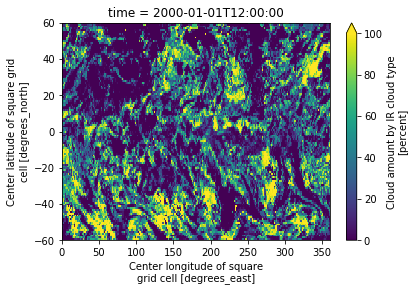

In [30]:
ds['cldamt_irtypes'].isel(time = 4, cloud_irtype = 0).plot.imshow(vmax = 100)

In [35]:
low_cloud_ds = ds['cldamt_irtypes'].isel(cloud_irtype = 0)

In [112]:
# ds.isel(time = 10000)['cldamt'].plot.imshow(vmax = 200)
# ds.isel(time = 10000)['cldamt'].plot.hist()
ds.isel(time = 10000)['cldamt']

<xarray.DataArray 'cldamt' (lat: 120, lon: 360)>
dask.array<getitem, shape=(120, 360), dtype=float32, chunksize=(120, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     datetime64[ns] 2003-06-04
Attributes:
    valid_min:      -500
    valid_max:      500
    description:    Cloud detected by either IR or VIS thresholds (IR at nigh...
    standard_name:  isccp_cloud_area_fraction
    long_name:      Cloud amount
    units:          percent

In [116]:
# all_grid_file_paths_c = all_grid_file_paths.copy()
# all_grid_file_paths = all_grid_file_paths_c + all_grid_file_paths


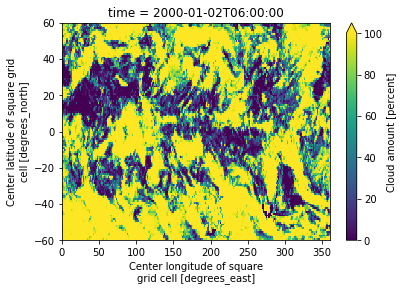

In [20]:
ds['cldamt'].isel(time = 10).plot.imshow(vmax = 100)

In [18]:
# ds['cldamt_irmarg'].isel(time = 0).plot.imshow()

In [31]:
cld_mean = ds['cldamt'].mean('time')
cld_mean.load()

<xarray.DataArray 'cldamt' (lat: 120, lon: 360)>
array([[84.85031 , 84.85031 , 84.9077  , ..., 83.87595 , 84.23704 ,
        84.23704 ],
       [84.90999 , 84.90999 , 85.4602  , ..., 84.01478 , 84.08987 ,
        84.08987 ],
       [84.39841 , 84.39841 , 84.64092 , ..., 83.09577 , 83.130455,
        83.130455],
       ...,
       [77.36927 , 77.36927 , 76.85457 , ..., 74.44616 , 74.00048 ,
        74.00048 ],
       [78.45724 , 78.45724 , 77.713165, ..., 74.341385, 76.08333 ,
        76.08333 ],
       [79.12021 , 79.12021 , 77.01897 , ..., 77.92719 , 76.53466 ,
        76.53466 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5

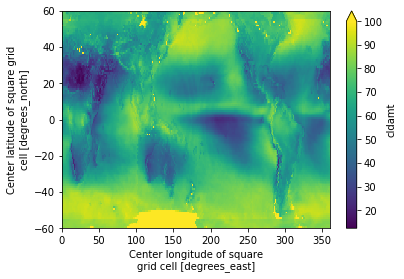

In [32]:
cld_mean.plot.imshow(vmax = 100)

In [90]:
ds_sub = ds['cldamt'].to_dataset()

In [142]:
# quality control cloud cover (should be [0, 100], else nan)
ds_sub['cldamt'] = ds_sub['cldamt'].where((ds_sub['cldamt'] <= 100) 
                                          & (ds_sub['cldamt'] >= 0), np.nan)

In [42]:
ds_sub = ds['cldamt_irtypes'].isel(cloud_irtype = 0).copy()
ds_sub = ds_sub.where((ds_sub <= 100) & (ds_sub >= 0), np.nan)
ds_sub = ds_sub.to_dataset()

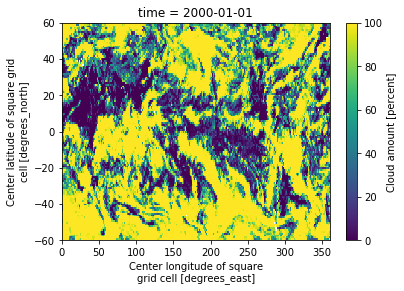

In [143]:
ds_sub['cldamt'].isel(time = 0).plot.imshow()

In [43]:
ds_sub.load()


<xarray.Dataset>
Dimensions:         (lat: 120, lon: 360, time: 29232)
Coordinates:
  * lat             (lat) float32 -59.5 -58.5 -57.5 -56.5 ... 57.5 58.5 59.5
  * lon             (lon) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time            (time) datetime64[ns] 2000-01-01 ... 2010-01-01T21:00:00
Data variables:
    cldamt_irtypes  (time, lat, lon) float32 0.0 0.0 3.7999992 ... 52.9 52.9

In [162]:
ds_sub_mean = ds_sub.mean('time')

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 360, time: 29232)
Coordinates:
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2000-01-01 ... 2010-01-01T21:00:00
Data variables:
    cldamt   (time, lat, lon) float32 100.0 100.0 100.0 100.0 ... 61.6 72.4 72.4

# Diurnal Cycle Analysis

In [44]:
mu_season, sigma_season, ampl_season, phase_season = diurnal_analysis(ds_sub, 
#                                                                       field_id = 'cldamt', 
                                                                      field_id = 'cldamt_irtypes',
                                                                      grid_time_resolution_hours = 3,
                                                                      time_resolution_hours = 1)

  1%|          | 56/7232 [00:00<00:12, 554.13it/s]

DJF


100%|██████████| 7232/7232 [00:12<00:00, 564.71it/s]
/home/cchristo/proj_tapio/diurnal_utils.py:222: RuntimeWarning: Mean of empty slice
  f_bar_k = np.nanmean(masked_field, axis = 0)
/home/cchristo/proj_tapio/diurnal_utils.py:240: RuntimeWarning: Mean of empty slice
  f_bar_k = np.nanmean(masked_field, axis = 0)
100%|██████████| 7232/7232 [00:13<00:00, 538.39it/s]
/home/cchristo/proj_tapio/diurnal_utils.py:269: RuntimeWarning: Mean of empty slice
  f_bar_k = np.nanmean(masked_field, axis = 0)
  0%|          | 0/120 [00:00<?, ?it/s]

Performing Cos Fit


100%|██████████| 120/120 [09:15<00:00,  4.63s/it]


Finished Cos Fit


  1%|          | 57/7360 [00:00<00:13, 561.70it/s]

JJA


  0%|          | 0/120 [00:00<?, ?it/s]

Performing Cos Fit


100%|██████████| 120/120 [10:05<00:00,  5.05s/it]


Finished Cos Fit


  1%|          | 56/7360 [00:00<00:13, 554.86it/s]

MAM


  0%|          | 0/120 [00:00<?, ?it/s]

Performing Cos Fit


100%|██████████| 120/120 [09:52<00:00,  4.94s/it]


Finished Cos Fit


  1%|          | 55/7280 [00:00<00:13, 541.95it/s]

SON


  0%|          | 0/120 [00:00<?, ?it/s]

Performing Cos Fit


100%|██████████| 120/120 [09:14<00:00,  4.62s/it]

Finished Cos Fit


'/home/cchristo/proj_tapio/figs/diurnal_cycle_figs/isccp_2000_2010_low_clouds/'

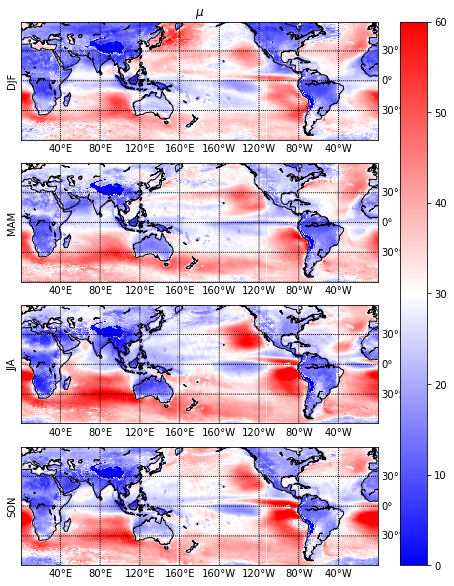

In [63]:
make_four_panel(mu_season , 
                lats = ds['lat'].values, 
                lons = ds['lon'].values,
                vmin = 0, vmax = 60, 
                cmap = plt.get_cmap('bwr'),
                title = r'$\mu$',
#                 axis = plt.axis([220, 300, 10, 50]), 
#                 save_fig_path = None)
                save_fig_path= save_figs_dir + 'GFDL_CM4_means.png')

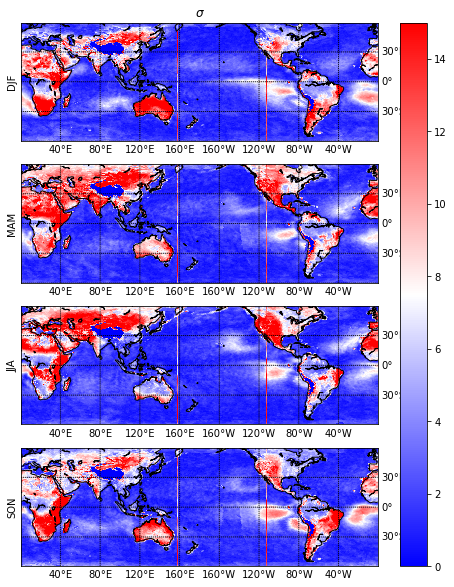

In [72]:
make_four_panel(sigma_season , 
                lats = ds['lat'].values, 
                lons = ds['lon'].values,
                vmin = 0, vmax = 15, 
                cmap = plt.get_cmap('bwr'),
                title = r'$\sigma$',
#                 axis = plt.axis([220, 300, 10, 50]), 
                save_fig_path= save_figs_dir + 'GFDL_CM4_stds.png')



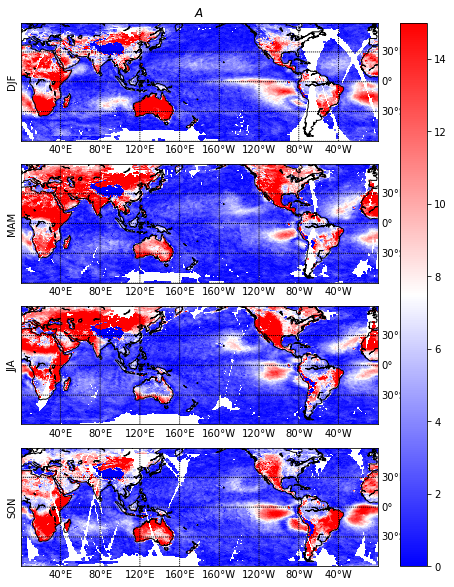

In [73]:
make_four_panel(ampl_season , 
                lats = ds['lat'].values, 
                lons = ds['lon'].values,
                vmin = 0, vmax = 15, 
                cmap = plt.get_cmap('bwr'),
                title = r'$A$',
#                 axis = plt.axis([220, 300, 10, 50]), 
                save_fig_path= save_figs_dir + 'GFDL_CM4_ampl.png')



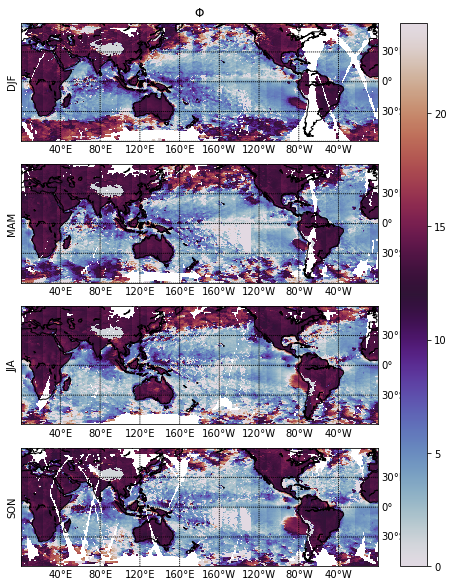

In [74]:
make_four_panel(phase_season , 
                lats = ds['lat'].values, 
                lons = ds['lon'].values,
                vmin = 0, vmax = 24, 
                cmap = plt.get_cmap('twilight'),
                title = r'$\Phi$',
                save_fig_path= save_figs_dir + 'GFDL_CM4_phase.png')

In [75]:
out_ds = xr.Dataset()
out_ds['mu_season'] = make_da_from_dict(mu_season, ds_sub)
out_ds['sigma_season'] = make_da_from_dict(sigma_season,ds_sub)
out_ds['ampl_season'] = make_da_from_dict(ampl_season,ds_sub)
out_ds['phase_season'] = make_da_from_dict(phase_season, ds_sub)

In [76]:
out_ds.to_netcdf(save_output_dir + 'isccp_2000_2010_low_clouds.nc')